In [1]:
from __future__ import unicode_literals

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


import antigravity

In [8]:
import geopandas as gpd
import pandas as pd

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
## Mi receta personal
#from matplotlib import rcParams
#rcParams.update({'font.size':20, 'font.family': 'sans'})#60,40
textplotsize = 11
rcParams['axes.labelsize'] = textplotsize
rcParams['xtick.labelsize'] = textplotsize
rcParams['ytick.labelsize'] = textplotsize
rcParams['legend.fontsize'] = textplotsize
rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams['text.usetex'] = True
rcParams['savefig.dpi'] = 200
from matplotlib.ticker import MaxNLocator
my_locator = MaxNLocator(8)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

In [7]:
xPoints=linspace(-15,15,256)
yPoints=linspace(-15,15,256)
X, Y  = np.meshgrid(xPoints,yPoints,indexing='ij')

In [8]:
ele = 1
PHI = arctan2(Y,X)
RAD = sqrt(X**2+Y**2)
Bx = (RAD**ele) * cos(ele*PHI)
By = -(RAD**ele) * sin(ele*PHI)
magB = sqrt(Bx**2+By**2)

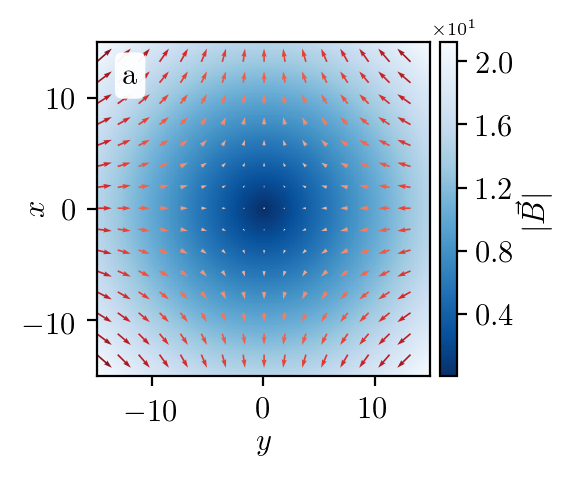

In [9]:
# Global scale, dont change!, ie. better work with a fix size in press edition
scale = 120
# Image size
width,height = 3*scale,3*scale

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig = figure(figsize=figsize, dpi=dpi, facecolor="white")
hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)
ax = fig.add_axes([border*hpixel, border*vpixel,
                  1-2*border*hpixel, 1-2*border*vpixel])
sampling=16
##############################################
ax.text(0.1, 0.9,"a",fontsize=textplotsize,
                verticalalignment='center', ha="center",
                transform=ax.transAxes,
                bbox=dict(edgecolor='none',facecolor='w', boxstyle='round,pad=0.25',alpha=.95),
                color='black')

#stream = ax.streamplot(X, Y, Bx, By, color=magB, linewidth=magB/magB.max()*1.5, cmap='Reds', 
#                    density=1, arrowsize=0.8,arrowstyle='fancy')
ax.quiver( Y[::sampling,::sampling],X[::sampling,::sampling],
                    By[::sampling,::sampling],Bx[::sampling,::sampling],
                    magB[::sampling,::sampling],width=0.15,linewidth=0.2,
                           cmap='Reds', alpha =0.95 , angles='xy', units='xy')
magn = ax.imshow(magB, origin='lower',cmap='Blues_r',
                 extent=[xPoints[0],xPoints[-1],yPoints[0],yPoints[-1]])

########################################################
divVel = make_axes_locatable(ax)
colVel = divVel.append_axes("right", size="5%", pad=0.05)
cbaux = colorbar(magn, cax=colVel,orientation='vertical')
cbaux.set_label(r'$|\vec{B}|$',rotation='vertical',va='top', labelpad=0)

tick_locator = ticker.MaxNLocator(nbins=6)
cbaux.locator = tick_locator
cbaux.formatter.set_powerlimits((0, 0))
offset = cbaux.ax.get_yaxis().get_offset_text()
offset.set_horizontalalignment('center')
offset.set_fontsize(6)
cbaux.update_ticks()

ax.set_xlabel('$y$', labelpad=0)
ax.set_ylabel('$x$', labelpad=-10)


fig.savefig('quadrupole.pdf',transparent=True, bbox_inches='tight',
        frameon=None)

In [73]:
fig.savefig('quadrupole.jpg',transparent=True, bbox_inches='tight',
        frameon=None)

In [74]:
gdf = gpd.read_file('data/Municipios/')
gdf.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((2793795.252400003 814557.6070000008,..."
1,09,013,Xochimilco,2,"POLYGON ((2800673.726999998 804500.9276000001,..."
2,09,008,La Magdalena Contreras,3,"POLYGON ((2788802.361100003 811568.5179999992,..."
3,09,002,Azcapotzalco,4,"POLYGON ((2797499.0814 836759.364599999, 27975..."
4,09,014,Benito Juárez,5,"POLYGON ((2799250.717 820719.6733000018, 27992..."


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7cc0d6dd10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7cc0d63e90>)

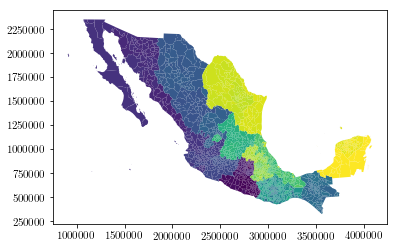

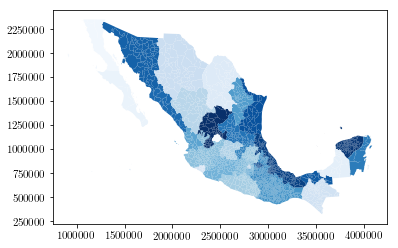

In [75]:
gdf.plot(column='OID'),gdf.plot(column='CVE_ENT', cmap='Blues')

(749062.9948949999, 4241756.139604997)

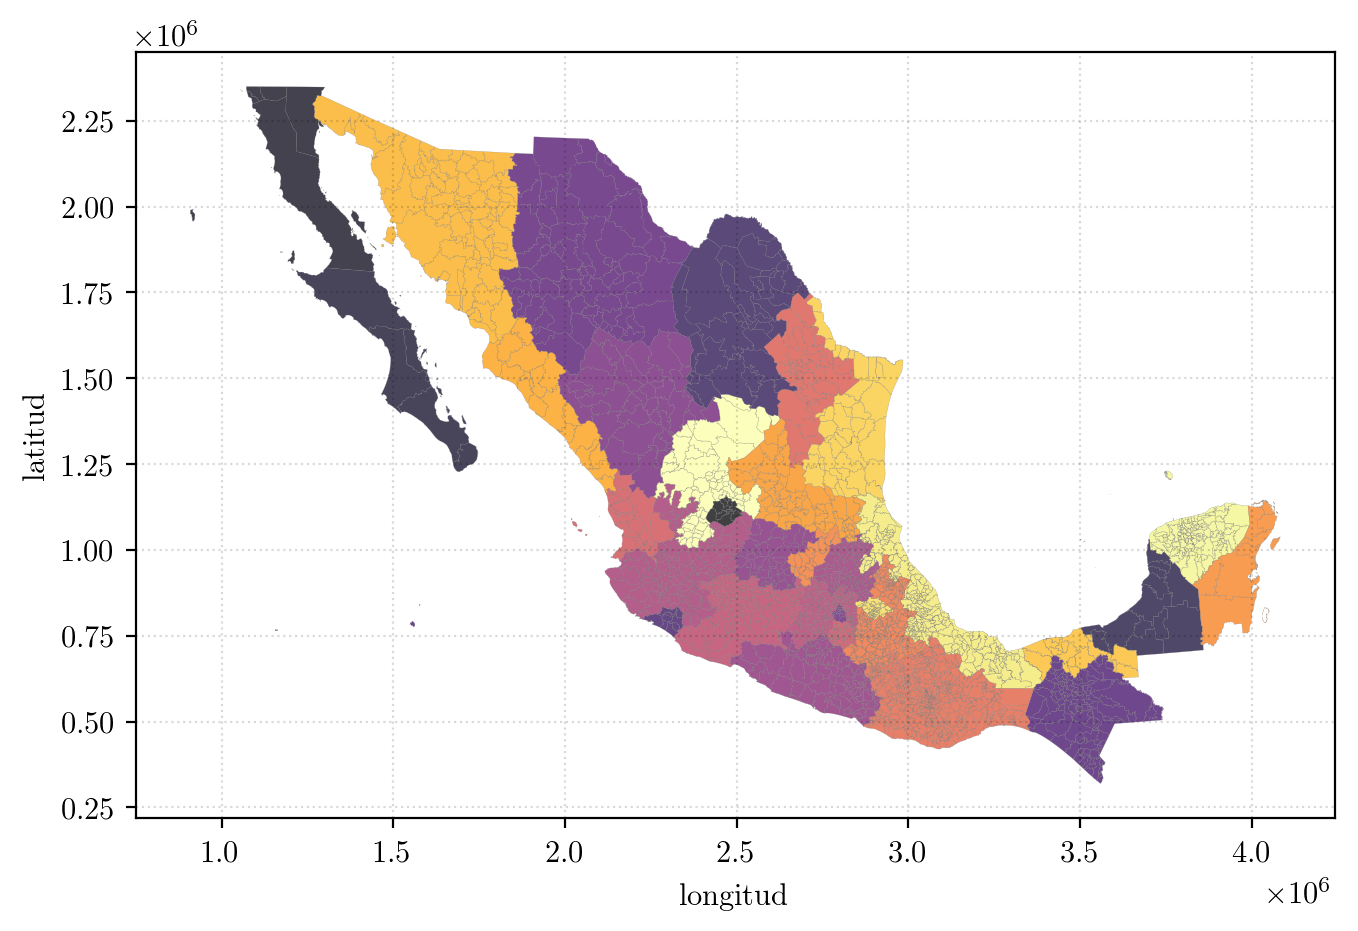

In [78]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
#########################################
ax.set_aspect('equal')
###########################################
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdf.plot(ax=ax,column='CVE_ENT', cmap='inferno', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
munis.get_xlim()

In [79]:
gdfEstados = gdf.dissolve('CVE_ENT', aggfunc='sum')

In [80]:
gdfEstados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32 entries, 01 to 32
Data columns (total 2 columns):
geometry    32 non-null object
OID         32 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


(749062.9948949999, 4241756.139604997)

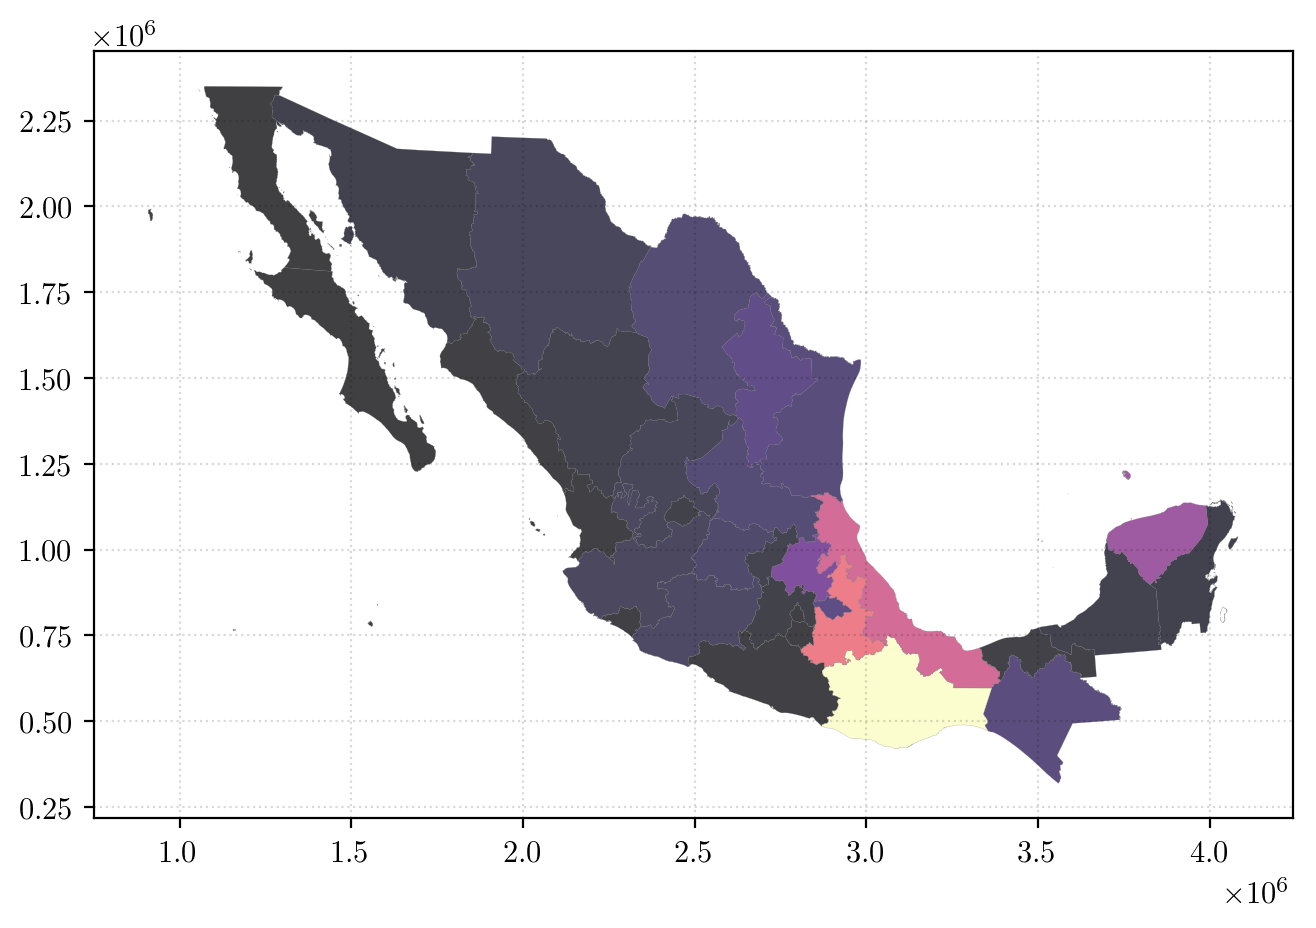

In [83]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdfEstados.plot(ax=ax,column='OID', cmap='magma', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
munis.get_xlim()

Marquemos los probes, de la ocacion anterior

In [84]:
vehicles = pd.read_csv('data/probe.probe').sample(10000)
vehicles.head()

,Unnamed: 0,timestamp,x,y,speed,provider
288484,6962739,2017-03-30T16:00:44Z,-100.897790,22.121189,0.000000,1
119191,8721032,2017-03-30T18:43:23Z,-100.370710,25.730750,0.000000,2
967385,9213513,2017-03-30T19:25:59Z,-98.020300,22.179850,88.000000,2
949963,2125505,2017-03-30T03:39:14Z,-99.510378,19.286145,0.000000,1
549281,9878836,2017-03-30T20:26:45Z,-116.862730,32.452045,13.910399,4


In [85]:
from shapely.geometry import Point, LineString, \
            MultiPoint, MultiLineString, Polygon, MultiPolygon

In [88]:
hacerPoint = lambda row: Point(row.x,row.y)
vehicles['geometry'] = vehicles.apply(hacerPoint,axis=1)
vehicles = gpd.GeoDataFrame(vehicles,geometry='geometry')

In [89]:
vehicles.head()

,Unnamed: 0,timestamp,x,y,speed,provider,geometry
288484,6962739,2017-03-30T16:00:44Z,-100.897790,22.121189,0.000000,1,POINT (-100.89779 22.121189)
119191,8721032,2017-03-30T18:43:23Z,-100.370710,25.730750,0.000000,2,POINT (-100.37071 25.73075)
967385,9213513,2017-03-30T19:25:59Z,-98.020300,22.179850,88.000000,2,POINT (-98.02030000000001 22.17985)
949963,2125505,2017-03-30T03:39:14Z,-99.510378,19.286145,0.000000,1,POINT (-99.510378 19.286145)
549281,9878836,2017-03-30T20:26:45Z,-116.862730,32.452045,13.910399,4,POINT (-116.86273 32.452045)


In [90]:
vehicles.loc[vehicles.provider==1].head()

,Unnamed: 0,timestamp,x,y,speed,provider,geometry
288484,6962739,2017-03-30T16:00:44Z,-100.897790,22.121189,0.0,1,POINT (-100.89779 22.121189)
949963,2125505,2017-03-30T03:39:14Z,-99.510378,19.286145,0.0,1,POINT (-99.510378 19.286145)
549373,4016300,2017-03-30T10:11:44Z,-100.506682,25.752114,93.0,1,POINT (-100.506682 25.752114)
966943,7364614,2017-03-30T16:38:40Z,-101.855941,21.019417,0.0,1,POINT (-101.855941 21.019417)
470023,10617070,2017-03-30T21:34:53Z,-98.821620,20.010477,0.0,1,POINT (-98.82162 20.010477)


In [91]:
type(vehicles)

geopandas.geodataframe.GeoDataFrame

In [94]:
vehicles.crs = {'init' :'epsg:4326'}

In [95]:
gdfEstados = gdfEstados.to_crs({'init' :'epsg:4326'})
gdfEstados.crs
#vehicles = vehicles.to_crs({'init' :'epsg:4326'})

{u'init': u'epsg:4326'}

(-119.99251176492017, -85.12554305601556)

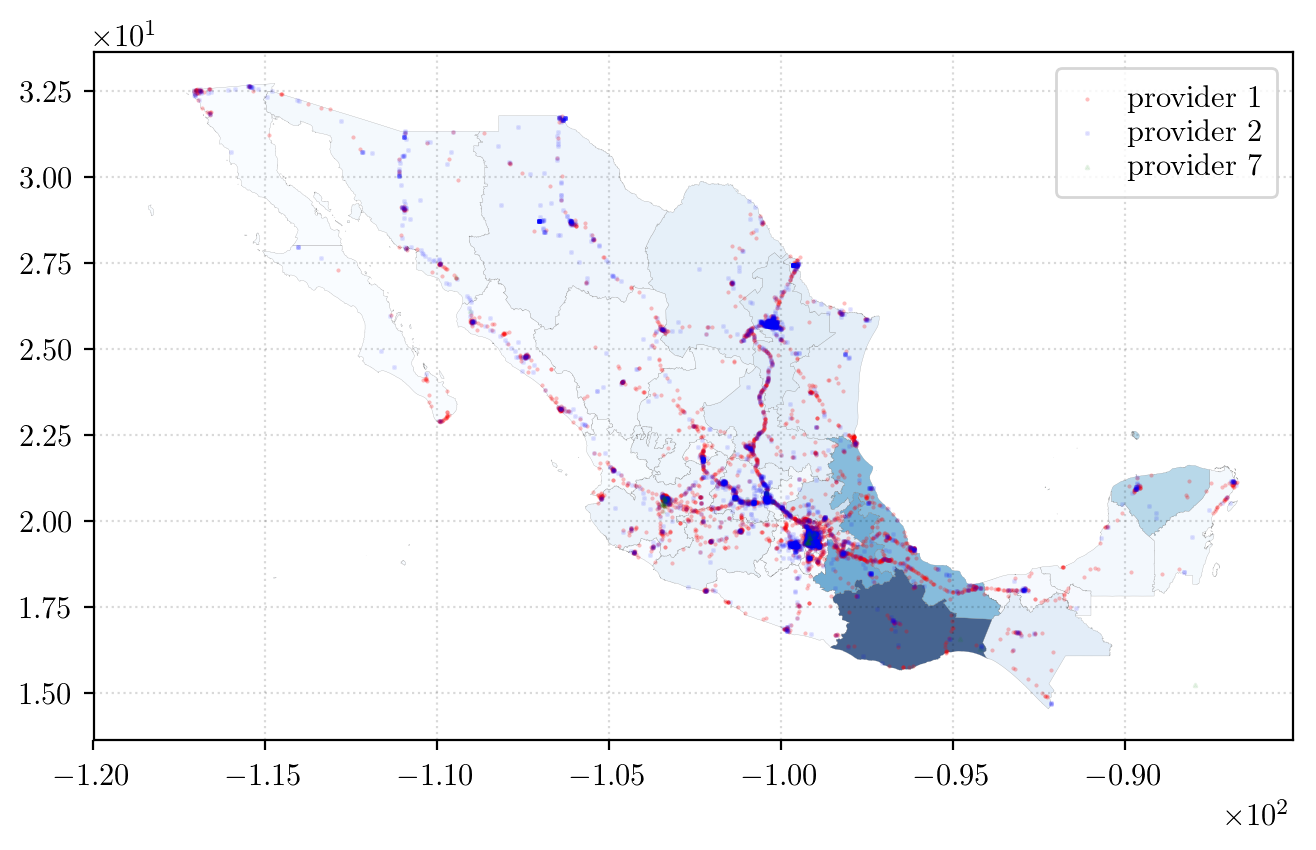

In [100]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdfEstados.plot(ax=ax,column='OID', cmap='Blues', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
vs = vehicles.loc[vehicles.provider==1].plot(ax=ax, marker='.', color='red', 
                                             markersize=1, label='provider 1', alpha=0.25)
vs = vehicles.loc[vehicles.provider==2].plot(ax=ax, marker=',', color='blue', 
                                             markersize=1, label='provider 2', alpha=0.1)

vs = vehicles.loc[vehicles.provider==7].plot(ax=ax, marker='^', color='green', 
                                             markersize=1, label='provider 7', alpha=0.1)

ax.legend(loc=1,labelspacing=0.1,fancybox=True ,handlelength=1., borderaxespad=.5, 
       borderpad=0.5, fontsize=textplotsize)
munis.get_xlim()

In [101]:
fig.savefig('myMAP.pdf',transparent=True, bbox_inches='tight',
        frameon=None)

In [102]:
norm = Normalize()
colorMAP = cm.Reds(norm(vehicles.loc[vehicles.provider==1,'speed'].map(abs).values))

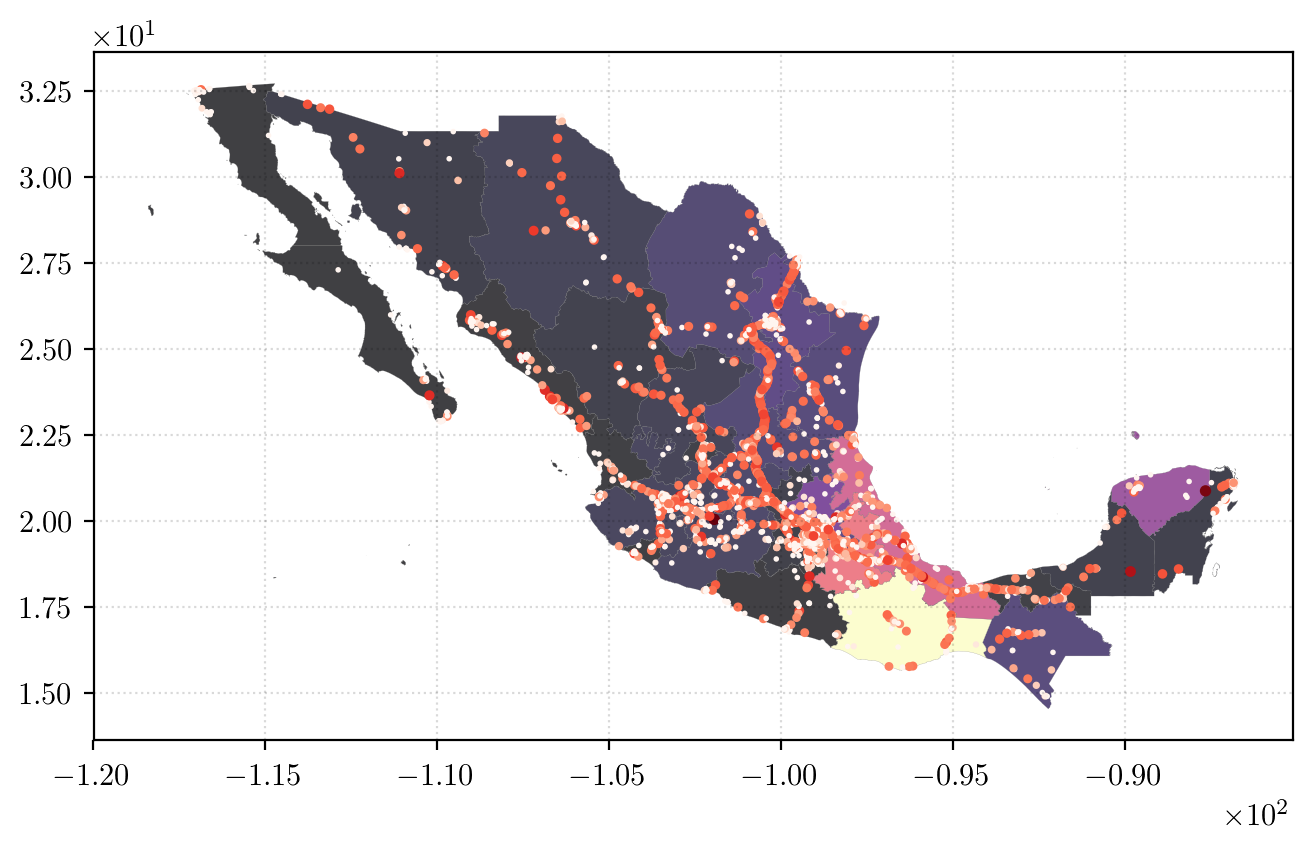

In [103]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdfEstados.plot(ax=ax,column='OID', cmap='magma', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
vs = vehicles.loc[vehicles.provider==1].plot(ax=ax, marker='o', 
                                             color=colorMAP,# cmap='Blues',
                                             markersize=1+0.05*vehicles.loc[vehicles.provider==1,
                                                                            'speed'].map(abs))

#vehicles.loc[vehicles.provider==5].plot( marker='o', color='green', markersize=5)

In [163]:
norm = Normalize()
colorMAP = cm.Reds(norm(vehicles.loc[vehicles.provider==1,'speed'].map(abs).values))

In [104]:
vMax  = vehicles.loc[vehicles.provider==1,'speed'].max()

In [105]:
vMax

177.0

vehicles.loc[vehicles.provider==1,'speed'].map(lambda x:x/170.)

In [144]:
vehicles.loc[vehicles.provider==1,'speed'].map(abs).mean(),vehicles.loc[vehicles.provider==1,'speed'].mean()

(27.602445652173913, 27.602445652173913)

## Quiz: Haga lo mismo para la CDMX, o el estado de su preferencia.
## Quiz: Como eliminarian los datos con velocidad 0, y asi determinar las rutas más rápidas?

## Quiz: Haganlo para las tiendas COPP
## Quiz: Hagan un histograma por velocidad, para cada provider. Que clase de distribucion es?

vehicles.provider

vehicles.loc[vehicles.provider==1,'speed'].map(abs)

## Datos sismo: https://earthquake.usgs.gov/earthquakes/eventpage/us2000ar20#shakemap

In [12]:
gdfEstados = gpd.read_file('data/Municipios/')
gdfEstados = gdfEstados.to_crs({'init' :'epsg:4326'})
gdfEstados.crs
gdfCDMX = gdfEstados.loc[gdfEstados.CVE_ENT=='09',:]

In [13]:
gdfCDMX.crs

{'init': 'epsg:4326'}

In [14]:
gdfCDMX.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,POLYGON ((-99.19671103314359 19.30240497001843...
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831454 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070158 19.27620941570174...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621087 19.50284888316688...
4,09,014,Benito Juárez,5,"POLYGON ((-99.1434996848309 19.35724145471907,..."


import geopandas as gpd
import pandas as pd
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

from convertMKLMKZ import *

a = keyholemarkup2x('data/danos_y_derrumbes.kmz',output='gpd')
a = keyholemarkup2x('data/danos_y_derrumbes.kmz',output='shp')

In [35]:
sismicShape     = gpd.read_file('data/shape/')
sismicIntensity = gpd.read_file('data/cont_mi.json')
sismicStations  = gpd.read_file('data/stationlist.json')

In [36]:
sismicIntensity.head()

,value,units,color,weight,geometry
0,2.5,intensity,#b0d9ff,4,"(LINESTRING (-102.211637484 13.8099, -102.2137..."
1,3.0,intensity,#a0e6ff,2,"(LINESTRING (-93.48869999999999 15.7641030746,..."
2,3.5,intensity,#90f3ff,4,"(LINESTRING (-98.5553666667 22.4991260323, -98..."
3,4.0,intensity,#80ffff,2,"(LINESTRING (-99.1887 20.5252613119, -99.18036..."
4,4.5,intensity,#7dffc9,4,"(LINESTRING (-98.3803666667 20.1909974637, -98..."


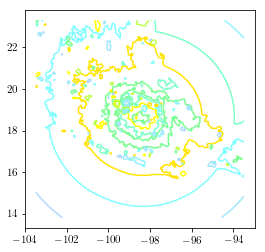

In [37]:
sismicIntensity.plot(color=sismicIntensity.color.values)

In [38]:
sismicStations.head()

,id,code,name,instrumentType,source,network,commType,location,intensity,intensity_flag,pga,pgv,distance,channels,imagemap,geometry
0,DYFI.1,1,UTM:(13Q 0668 2287 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,2.0,,0.00,0.00,556.90,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [77, 203...",POINT (-103.3823 20.6793)
1,DYFI.10,10,UTM:(14Q 0469 2140 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,5.4,,7.91,8.20,120.79,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [269, 26...",POINT (-99.29040000000001 19.3583)
2,DYFI.100,100,UTM:(14Q 0483 2137 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,6.5,,16.11,18.28,109.79,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [275, 27...",POINT (-99.1571 19.3314)
3,DYFI.101,101,UTM:(14Q 0483 2138 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,6.3,,14.20,15.80,110.45,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [275, 26...",POINT (-99.1571 19.3404)
4,DYFI.102,102,UTM:(14Q 0483 2139 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,7.5,,29.92,37.89,111.12,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [275, 26...",POINT (-99.1571 19.3494)


In [39]:
sismicShape.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry
0,0.0,0.0,2,1,2,0.02,POLYGON ((-97.52909063364115 21.44888066783831...
1,0.0,0.0,3,2,2,0.02,POLYGON ((-98.79750561373764 21.42388945518453...
2,0.0,0.0,4,3,2,0.02,POLYGON ((-98.04846501555183 21.35724622144112...
3,0.0,0.0,5,4,2,0.02,POLYGON ((-98.06553333339951 21.34058541300527...
4,0.0,0.0,6,5,2,0.02,"POLYGON ((-97.5398167336634 21.24895096660808,..."


In [40]:
sismicShape['isocontours'] = sismicShape.boundary
sismicShape['sismic_regions'] = sismicShape.geometry

In [41]:
sismicShape.crs,sismicStations.crs

({'init': u'epsg:4326'}, {'init': u'epsg:4326'})

In [42]:
sismicShape.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry,isocontours,sismic_regions
0,0.0,0.0,2,1,2,0.02,POLYGON ((-97.52909063364115 21.44888066783831...,LINESTRING (-97.52909063364115 21.448880667838...,POLYGON ((-97.52909063364115 21.44888066783831...
1,0.0,0.0,3,2,2,0.02,POLYGON ((-98.79750561373764 21.42388945518453...,LINESTRING (-98.79750561373764 21.423889455184...,POLYGON ((-98.79750561373764 21.42388945518453...
2,0.0,0.0,4,3,2,0.02,POLYGON ((-98.04846501555183 21.35724622144112...,LINESTRING (-98.04846501555183 21.357246221441...,POLYGON ((-98.04846501555183 21.35724622144112...
3,0.0,0.0,5,4,2,0.02,POLYGON ((-98.06553333339951 21.34058541300527...,LINESTRING (-98.06553333339951 21.340585413005...,POLYGON ((-98.06553333339951 21.34058541300527...
4,0.0,0.0,6,5,2,0.02,"POLYGON ((-97.5398167336634 21.24895096660808,...",LINESTRING (-97.5398167336634 21.2489509666080...,"POLYGON ((-97.5398167336634 21.24895096660808,..."


import geopandas as gpd
import pandas as pd
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

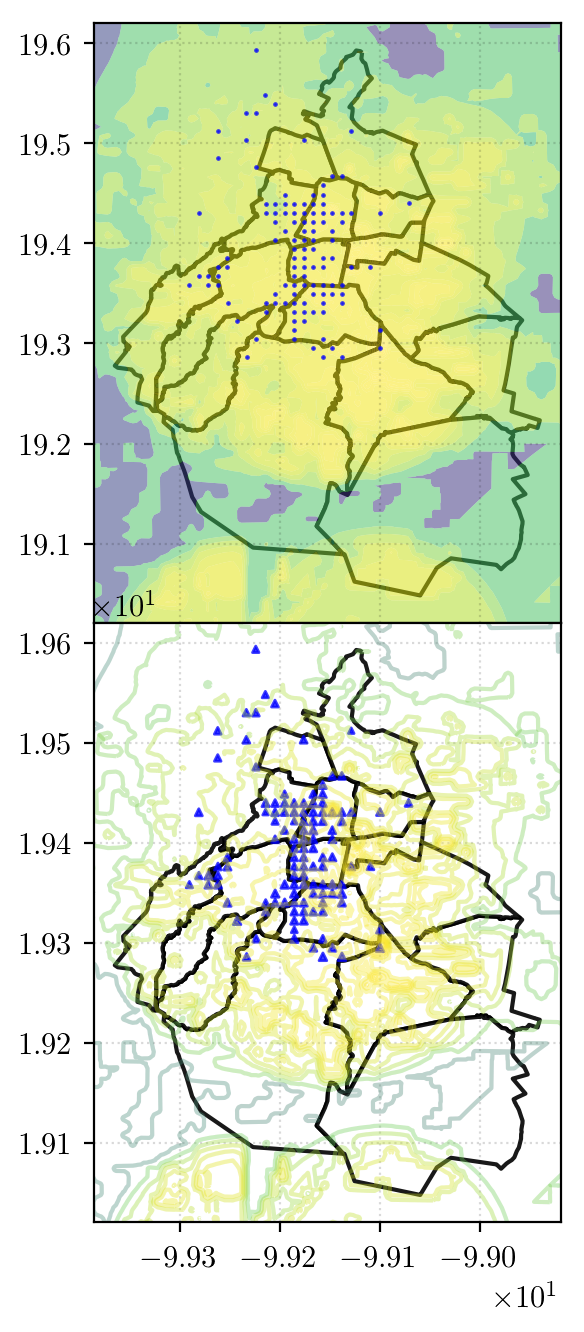

In [49]:
scale = 200
# Image size
nsubX = 1
nsubY = 2

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharex=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

sismicShape.geometry = sismicShape.sismic_regions

ax[0].grid(True, color='black', ls=':', alpha=0.15)
a = gdfCDMX.plot(ax = ax[0],column='CVE_MUN',alpha=1,color='w',edgecolor=(0,0,0),lw=1.5)
xlims = a.get_xlim()
ylims = a.get_ylim()
sismicShape.plot(ax = ax[0],column='PGAPOL_ID',alpha=0.55,cmap='viridis')#,edgecolor=(0,0.75,0.75),lw=1)
sismicStations.plot(ax = ax[0],marker='.',alpha=0.75,color='b', markersize=2)
ax[0].set_xlim(xlims)
ax[0].set_ylim(ylims)
ax[0].set_aspect('equal')

sismicShape.geometry = sismicShape.isocontours


ax[1].grid(True, color='black', ls=':', alpha=0.15)
a = gdfCDMX.plot(ax = ax[1],column='CVE_MUN',alpha=0.9,color='w',edgecolor=(0,0,0),lw=1.5)
xlims = a.get_xlim()
ylims = a.get_ylim()
sismicShape.geometry = sismicShape.isocontours
sismicShape.plot(ax = ax[1],column='PGAPOL_ID',alpha=0.2,cmap='viridis')#,edgecolor=(0,0.75,0.75),lw=1)
sismicStations.plot(ax = ax[1],marker='^',alpha=0.75,color='b', markersize=sismicStations.intensity)
ax[1].set_xlim(xlims)
ax[1].set_ylim(ylims)
ax[1].set_aspect('equal')

Recuerden que una arreglo de graficas lo pueden realizar con : subplots(numero de renglones, numero de columnas)

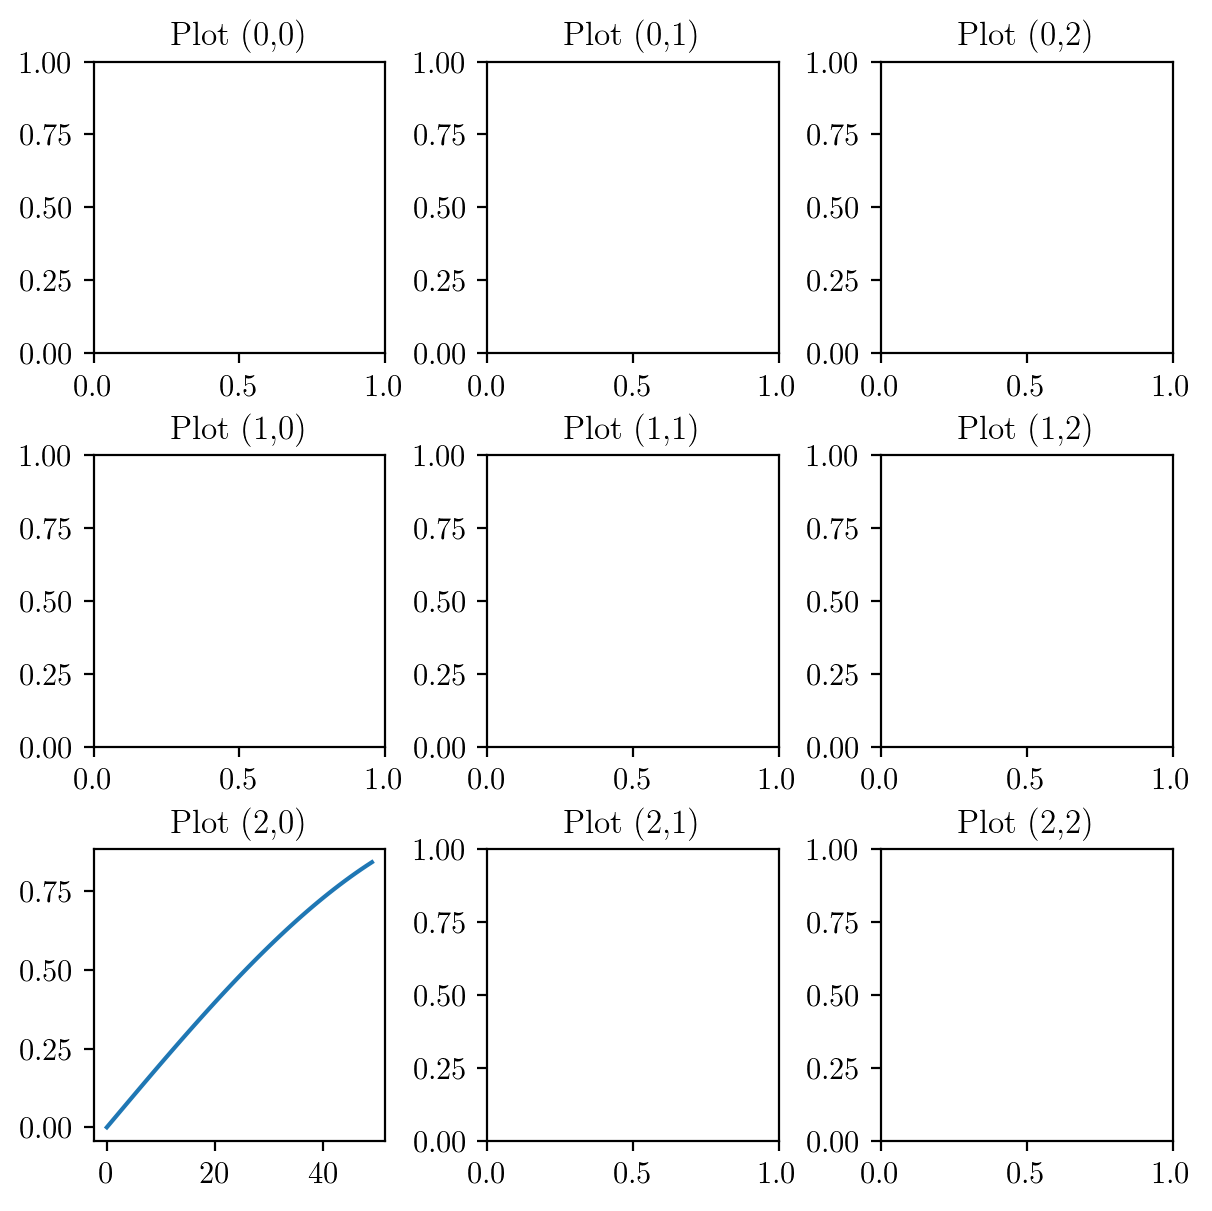

In [64]:
scale = 120
# Image size
nsubX = 3 # Renglones
nsubY = 3 # Columnas

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=False,sharex=False)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0.35, hspace=0.35)

countx, county = 0,0
for i in ax:
    county = 0
    for j in i:
        j.set_title('Plot ({0},{1})'.format(countx,county))
        county += 1
    countx += 1
    
# Accediendo a unas sola grafica
ax[2,0].plot(sin(linspace(0,1)))

In [45]:
justLimCDMX = gdfCDMX.dissolve('CVE_ENT')


In [46]:
justLimCDMX.head()

,geometry,CVE_MUN,NOM_MUN,OID
CVE_ENT,,,,
09,POLYGON ((-98.96852792721931 19.21057108168326...,012,Tlalpan,1


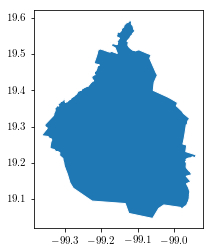

In [47]:
justLimCDMX.plot(edgecolor='w')

In [25]:
intCDMX = sismicShape.intersects(justLimCDMX) # No funciona, alguien sabe por que?

In [ ]:
a = gpd.overlay(justLimCDMX,sismicShape, how='intersection') # Tampoco funciona, alguien sabe por que?